In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Twitter API credentials
consumerKey = ("YOUR_KEY")
consumerSecret = ("YOUR_KEY")
accessToken = ("YOUR_KEY")
accessTokenSecret =("YOUR_KEY")

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)


# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)


# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


# Extract 100 twwets from the twitter user
posts  = api.user_timeline(screen_name = "elonmusk", count = 100, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
i = i + 1

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame ([tweet.full_text for tweet in posts] , columns=['Tweets'])

#show the first 5 rows of data
df.head()

#Clean the Text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
    text =re.sub(r'#', '', text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\s+', '', text) #Remove the hyper link
    return text

# Cleaning the text
df['Tweets']= df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df["Tweets"].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

In [ ]:
# Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a funtion to compute the negative, netural and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Netral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

In [ ]:
# print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j+1

1) To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: https://t.co/jvpjjg1jUY

2) We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: 
EarthDay https://t.co/o6CISr0GD2

3) Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that COVID will cost nearly $14 trillion. We can save trillions by spending billions. https://t.co/uaIhdLHD4u

4) Changing mindsets is never easy, but Sudha Varghese empowers girls to believe in themselves and see their potential for greatness: https://t.co/IJ0LM8wJHd https://t.co/qOR3gsGV6s

5) Kakenya Ntaiya founded  to enable girls’ education and end harmful traditional practices like child marriage. Her story is a powerful example of how one person’s act of bravery can spark dramatic change. https://t.co/qrEJrqOrwD https://t.co/20

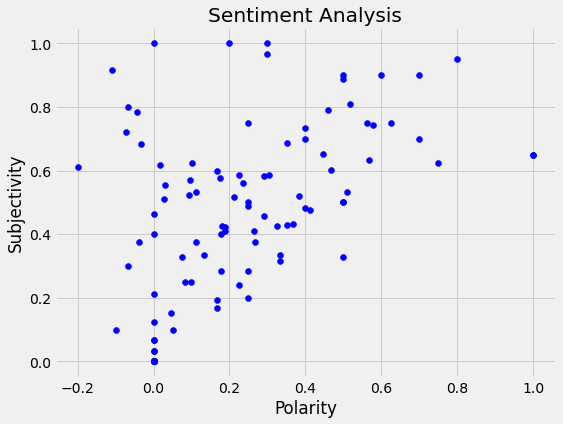

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

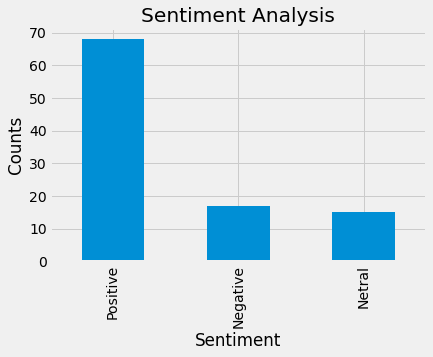

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

# Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()